# Machine Learning - Practical 2 - Introduction to Pytorch and Linear Regression with Pytorch

Names: {Ayush Poudel, Santosh Luitel}  
Summer Term 2024   

# IMPORTANT SUBMISSION INSTRUCTIONS

You should work on the exercises in groups of 2-3. It is on you how you collaborate, but please make sure that everyone contributes equally and also that you understand all the solutions.
You will be asked to present your group's solution in the tutorials and you should be well prepared to present any part of it.

- When you've completed the exercise, download the notebook and rename it to ```<surname1>_<surname2>_<surname3>.ipynb```.
- Only submit the Jupyter Notebook (ipynb file). No other file is required. Upload it on `Stud.IP` -> `Machine learning 1` -> `Files` -> `Submission of Homework 1`.
- Make only one submission of the exercise per group.
- The deadline is strict.
- In addition to the submissions, every member of your group should be prepared to present the exercise in the tutorials.

Implementation
- Do not change the cells which are marked as "DO NOT CHANGE", similarly write your solution to the marked cells.

## How to work on the exercise?

Generally, for machine learning you often need access to a machine with a GPU. This is not strictly required for this homework but we recommend using [Kaggle](https://www.kaggle.com/), which offers convenient access to a GPU and has all the dependencies that we need preinstalled ([here](https://gist.github.com/anwai98/444d3ff11c1365f2c610579d5df0830b) are some initial steps to work with Kaggle Notebooks). You can load this notebook on kaggle via `File` -> `Import Noteboook` -> `Browse and  Import`. Alternatively, you can also use [Colab](https://colab.research.google.com).

# Introduction

In this task you will get to know the basic tools used by the machine learning community.
Later, we will build a linear regression model with PyTorch and perform training and prediction the linear regression problem from the previous practical. The goal of this tutorial is to understand the PyTorch framework and getting to know to use it. 

## Tutorials

Some python libraries are required to accomplish the tasks assigned in this homework. If you feel like you need to follow a tutorial before, feel free to do so:

*   [PyTorch Tutorial](https://pytorch.org/tutorials/)
*   [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) (data visualization library on top of matplotlib)


In [1]:
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import pathlib
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import sampler

In [2]:
torch.set_default_dtype(torch.float64)

## System checks

Perform some rudimentary system checks. Do we have a CUDA-capable device? Multiple? Is CuDNN active (huge speedups for some networks)?

In [3]:
torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count()

(True, True, 2)

If you see now that now that there is no CUDA-capable device available, you have to activate the GPU.

Click the top-right corner menu `|<` -> `Settings` -> `Accelerator` -> Select `GPU` as Hardware accelerator.

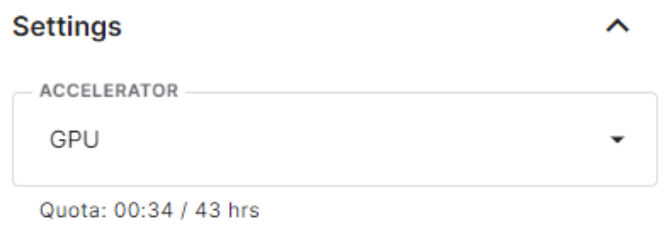

Now check the availability again (after re-running the imports)

In [4]:
torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count(), torch.cuda.current_device()

(True, True, 2, 0)

Choose your device for computation. CPU or one of your CUDA devices?

In [5]:
# DO NOT CHANGE
use_cuda = True
#use_cuda = False
use_cuda = False if not use_cuda else torch.cuda.is_available()
device = torch.device('cuda:0' if use_cuda else 'cpu')
torch.cuda.get_device_name(device) if use_cuda else 'cpu'
print('Using device', device)

Using device cuda:0


# PyTorch: Getting to know Tensors

*feel free to skip this before 'Machine Learning with Pytorch' section if you feel confident enough*   
PyTorch is a library for machine learning on arbitrary datasets, including irregular input data such as graphs, point clouds and manifolds.

In this short tutorial we will explore some of its features to handle data in tensors.
If you want, you can look into more [detailed PyTorch tutorials](https://pytorch.org/tutorials/) online.

In [6]:
# create a numpy array
numpyarray = np.arange(10).reshape(2, 5)
# convert to pytorch tensor
a = torch.from_numpy(numpyarray)

Let us find out what the properties of this tensor 'a' are.

In [7]:
# TODO print the tensor
print(a)


tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [8]:
# TODO print its type
print(a.type())
print(a.dtype)

torch.LongTensor
torch.int64


In [9]:
# TODO print its shape
print(a.shape)

torch.Size([2, 5])


In [10]:
# TODO print its size
print(a.size())


torch.Size([2, 5])


In [11]:
# TODO create a new numpy array out of the tensor and print its size
b = a.numpy()
print(b.shape)
print(b.size)


(2, 5)
10


Let's create some new tensors.

In [12]:
# TODO create a tensor of shape (2,5) filled with ones of type int and print it
myTensor = torch.ones(2,5)
print(myTensor)


tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [13]:
# TODO create a tensor of shape (3,4) filled with zeros and print it
secondTensor = torch.zeros(3,4)
print(secondTensor)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [14]:
# TODO transpose the tensor 'a'
torch.transpose(a,0,1)


tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

Now change a value in the numpy array. Does the corresponding tensor change?

In [15]:
# TODO change value in numpy array and inspect the tensor a
b[1,2] = 21
print(b)
print(a)

a[1,2] = 31
print(a)
print(b)


[[ 0  1  2  3  4]
 [ 5  6 21  8  9]]
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6, 21,  8,  9]])
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6, 31,  8,  9]])
[[ 0  1  2  3  4]
 [ 5  6 31  8  9]]


**TODO Your answer here** 

Does it work the other way round as well?

> Yes, it works the other way around also.


Now we want to make use of the different devices available, namely cpu and gpu.

In [16]:
# TODO move 'a' to the gpu
a[1,2] = 44
print(a)






tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6, 44,  8,  9]])


If you change a value in the tensor 'a' now, does the corresponding value in the tensor on the GPU change as well?

> When we change the value in the tensor 'a', there is no change in the corresponding value in the tensor on the GPU.


In [17]:
a_gpu = a.to(device='cuda')

print(a_gpu)
print(a)
a[1,2] = 55

print(a_gpu)
print(a)






tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6, 44,  8,  9]], device='cuda:0')
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6, 44,  8,  9]])
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6, 44,  8,  9]], device='cuda:0')
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6, 55,  8,  9]])


# Machine Learning with Pytorch

The process of training and evaluating a machine learning model begins with **data loading**.
A dataset needs to be chosen on which the model should be trained.
This data might need some preprocessing (like resizing or normalizing) of images. As Pytorch does not have in-build preprocessing for data panels we have to define our custom normalization inside a Dataset or Dataloader.
Splitting of the data in different sets is necessary. We need a set to train on, a set to validate the training progress and a set to test the model after training.

The next step is to **specify the model and its optimizer**, as well as the loss function.
An important hyperparameter is the learning rate which influences how big the changes of the parameters should be after calculating the loss.

The **model fitting** is split into training and evaluation.
In the training process the model does a forward pass which means the data is presented to the model and the model outputs a prediction.
The loss compares the prediction with the ground truth.
In the backward pass the gradient with regard to the parameter is calculated and the parameter are updated by the gradient step.
In the evaluation process the loss is computed on the entire validation set.
This is done to see how well the model operates on data for which the params were not optimized before in order to avoid overfitting.
The model fitting process is repeated for `N` epochs which is another hyperparameter that needs to be chosen carefully.

After the training we evaluate the final model on the test set.

We'll go through the individual steps in the course of this notebook using linear regression as an example.


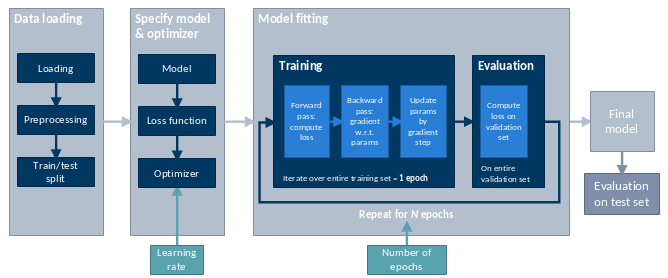

## Data Loading and Preprocessing

### Training, Validation and Test Sets

For the correct fitting of a neural network model we need three dataset components: one for training, one for validation in the training process, and the last one for testing the results of the training on unseen data.

Note that you should not use the test set in any part of your training and model selection procedure. It should be only used for showing the final results.  

Usually, train and test datasets are already split in the provided kaggle datasets but as we work with a custom dataset, we would have to make train-test split ourselves first.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
test_size = 0.2
target_clm='critical_temp'

In [20]:
torch.manual_seed(1)
random.seed(1)

In [21]:
# TODO: load data - same as in the previous practical and make train_test_split from sklearn
data = pd.read_csv('/kaggle/input/super-conductivity/superconduct_train.csv')
print(data.shape)

train,test = train_test_split(data,test_size = test_size, random_state = 42)
print(test.shape)
print(train.shape)




(21263, 82)
(4253, 82)
(17010, 82)


### Dataset

PyTorch has 2 entities to load data. They are **Dataset** and **Dataloader**.
**Dataset** is a class, which defines your data and often applies data preprocessing transformations, like normalization. It should have at least 3 functions :
* __init__ - as any other init. Usually, you would provide path to dataset here or dataset elements.
* __len__ - should return the whole dataset size
* __getitem__ - this function returns 1 pair of data and label, also here preprocessing transformations are usually applied



For the next exercise, take a look here for an example https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel

In [22]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, df, target_clm, mean=None, std=None, normalise=True):
        '''
        TODO: save params to self attributes,
        x is data without target column
        y is target column
        transform df to_numpy
        '''
        self.x = df.loc[:, df.columns != target_clm].values
        self.y = df.loc[:, df.columns == target_clm].values
        self.mean = mean
        self.std = std
        self.normalise = normalise

    def __len__(self):
        # TODO: return whole dataset length
        return len(self.x)
        

    def __getitem__(self, index):
        data = self.x[index]
        if self.normalise and self.mean is not None and self.std is not None:
            data = (data - self.mean) / self.std
        return data, self.y[index]

In [23]:
tmp_dataset = Dataset(train, target_clm, normalise=False)
print(len(tmp_dataset))

17010


In [24]:
# TODO calculate the mean and standard deviation of the train dataset
train_mean = np.mean(tmp_dataset.x,axis = 0)
train_std_deviation = np.std(tmp_dataset.x,axis=0)
for i in range(len(train_mean)):
    print("Mean and standard deviation of feature %d: %f, %f"%(i+1,train_mean[i],train_std_deviation[i]))


Mean and standard deviation of feature 1: 4.117578, 1.440019
Mean and standard deviation of feature 2: 87.552301, 29.604234
Mean and standard deviation of feature 3: 73.014222, 33.430778
Mean and standard deviation of feature 4: 71.230209, 30.957687
Mean and standard deviation of feature 5: 58.524760, 36.605988
Mean and standard deviation of feature 6: 1.165758, 0.364926
Mean and standard deviation of feature 7: 1.064644, 0.401294
Mean and standard deviation of feature 8: 115.807500, 54.776063
Mean and standard deviation of feature 9: 33.268249, 26.996236
Mean and standard deviation of feature 10: 44.469461, 20.086841
Mean and standard deviation of feature 11: 41.529829, 19.984937
Mean and standard deviation of feature 12: 769.788332, 87.654958
Mean and standard deviation of feature 13: 870.284583, 143.330249
Mean and standard deviation of feature 14: 737.655264, 78.511134
Mean and standard deviation of feature 15: 832.620868, 119.840642
Mean and standard deviation of feature 16: 1.299

In [25]:
# TODO define new datasets with mean, std and normalise=True
conductor_train = Dataset(train,target_clm, mean = train_mean, std = train_std_deviation, normalise = True)
conductor_test = Dataset(test, target_clm, mean = train_mean, std = train_std_deviation, normalise = True)
print(conductor_train.mean)




[4.11757790e+00 8.75523005e+01 7.30142221e+01 7.12302088e+01
 5.85247603e+01 1.16575787e+00 1.06464388e+00 1.15807500e+02
 3.32682487e+01 4.44694609e+01 4.15298287e+01 7.69788332e+02
 8.70284583e+02 7.37655264e+02 8.32620868e+02 1.29982324e+00
 9.28495511e-01 5.72425844e+02 4.82717218e+02 2.15689296e+02
 2.24104234e+02 1.57913092e+02 1.34749939e+02 1.44381559e+02
 1.21024549e+02 1.26839402e+00 1.13226504e+00 1.39381481e+02
 5.13245274e+01 5.16045745e+01 5.23450162e+01 6.10835219e+03
 5.26715243e+03 3.44899631e+03 3.11110002e+03 1.07269458e+00
 8.57139890e-01 8.67431503e+03 2.90942025e+03 3.42041426e+03
 3.32393190e+03 7.68351735e+01 9.25936162e+01 5.42601826e+01
 7.22048922e+01 1.07071156e+00 7.71729564e-01 1.20792337e+02
 5.92340515e+01 4.89519425e+01 4.44916042e+01 1.42455537e+01
 1.37967946e+01 1.01056386e+01 1.00983917e+01 1.09406172e+00
 9.15693613e-01 2.10660408e+01 8.17696259e+00 8.29188817e+00
 7.70226694e+00 8.97082808e+01 8.14930231e+01 2.96700577e+01
 2.71547665e+01 7.276013

We need to **split** the train dataset in two sets, one for training and one for validation.
While the training set needs to be quite large, the validation set can be relatively small.
Take 10 % of the dataset as validation set.
Assign samples *randomly* to the training and validation set, using a fixed seed to ensure that train and test splits are same across different model runs.

In fact, the good practice is to fix a global random seed not only the generator seed for even better reproducibility with `torch.manual_seed(0)`.
Machine learning models often involve random initialization of weights, augmentations, dropout layers, and other stochastic processes. Without fixing the random seed, each run of the model may produce slightly different results, making it challenging to reproduce specific results or debug issues.

In [26]:
# TODO split the train dataset in conductor_train and conductor_val
#torch.manual_seed(0)
conductor_train, conductor_val = train_test_split(conductor_train, test_size=0.1, random_state=42)
print(len(conductor_train))
print(len(conductor_val))
print(len(conductor_train)+len(conductor_val))



15309
1701
17010


In [27]:
batch_size = 256

To load the data for model training, we need to define the **dataloaders**.
A dataloader represents a Python iterable over a dataset and draws mini batches with random samples.
**Dataloader** calls \_\_getitem__ function from the Dataset and forms the batches.


Use the batch size as specified above.
Make sure we get shuffled samples in batches.

In [28]:
# TODO create dataloader for training, validation and test
train_dataloader = DataLoader(conductor_train, batch_size = batch_size, shuffle = True)
val_dataloader =  DataLoader(conductor_val, batch_size = batch_size, shuffle = True)
test_dataloader =  DataLoader(conductor_test, batch_size = batch_size, shuffle = True)

Let's get a data point now to see what we're dealing with.

For this, you might want to check out how python's iterator protocol works. It's simple and will give you an important insight into python: https://wiki.python.org/moin/Iterator.

In [29]:
# TODO get an element of the train_dataloader

data_point = iter(train_dataloader)
print(next(data_point)[0])



tensor([[-0.0817,  0.0921, -0.5238,  ..., -0.6494, -0.8420, -0.8997],
        [-0.7761, -0.3311, -0.0887,  ...,  2.2628,  0.2106,  0.6204],
        [ 1.3072,  0.5151,  0.8456,  ..., -0.3129,  0.5724,  1.3655],
        ...,
        [-1.4705,  0.6167,  0.9459,  ..., -0.5850, -0.7037, -0.3920],
        [ 2.6961,  0.9610,  0.4911,  ..., -0.7089,  0.5140,  1.0034],
        [-0.0817, -1.9137, -1.2598,  ..., -1.2594, -0.7037, -0.3874]])


In [30]:
# TODO print the dimensions of for elements from the previous step
print(next(data_point)[0].shape)
print(next(data_point)[1].shape)

torch.Size([256, 81])
torch.Size([256, 1])


x has size (\[batchsize\], 81) --> 256 elements/batches (or whatever you have defined in your data loader), 81 feature values.

y has size (\[batchsize\], 1) --> 256 elements/batches (again depends on your data loader config). There's one target value for each set of the features.

## Specify Model & Optimizer

### Specify a Model

The task is now to define a model to train on the data. In this simple example, we only need **one fully-connected layer** as defined in *torch.nn.Linear* that produces a predicted label for a specific training input row.

Before, we set some variables:
- the input and output size of the linear layer
- how long we want to train the model (number of epochs) and
- the learning rate.


In [31]:
epochs = 15
input_dim = 81
output_dim = 1
lr = 0.001

In [32]:
class LinearRegression(torch.nn.Module):
    """
    Linear regression model inherits the torch.nn.Module
    which is the base class for all neural network modules.
    """
    def __init__(self, input_dim, output_dim):
        """ Initializes internal Module state. """
        super(LinearRegression, self).__init__()
        # TODO define linear layer for the model
        self.linear = torch.nn.Linear(input_dim, output_dim)


    def forward(self, x):
        """ Defines the computation performed at every call. """
        # What are the dimensions of your input layer?
        # TODO flatten the input to a suitable size for the initial layer
        x = x.reshape(-1, 81)
        # TODO run the data through the layer
        outputs = self.linear(x)
        return outputs

### Instantiate the Model

Let us instantiate the model and take a look at the inside. It is always a good idea to verify that the actual architecture is what you intended it to be. Especially, when you start to create layers dynamically it is great for inspection/verification/debugging.

In [33]:
# TODO instantiate the model
model = LinearRegression(input_dim, output_dim)

Feed the model to the GPU if available.

In [34]:
# TODO move model to device you specified above
model.to(device)



LinearRegression(
  (linear): Linear(in_features=81, out_features=1, bias=True)
)

Put the model in training mode.

In [35]:
# TODO put the model in train mode
model.train()

LinearRegression(
  (linear): Linear(in_features=81, out_features=1, bias=True)
)

### Define a Loss Function

Since we're dealing with regression problem, [MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) is the canonical choice for the loss.

In [36]:
# TODO define the loss function
loss_function = torch.nn.MSELoss()



## Model Fitting

### Train the Model

Everything is set for the model to train!

- In the forward pass, the prediction is made using the previously defined model on the elements of the dataloader.
- Then the loss (or error) needs to be computed by comparing the prediction to the actual label.
- In the backward pass, the model learns and updates its weights based on the current gradient.

### First, let's do all of the steps manually, without using the optimizer

**Hints:**
* define number of epochs to see the dynamic. You need to see the effect over several epochs but it should no be too long. 
* use learning rate defined above as `lr`
* when doing parameters update - do it under `with torch.no_grad():`. This would disable the gradient computation for the operations under it. And we don't need gradients for updating the weights step.
* you need to update the model parameters. See [here](https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html) for more details on how to access them
* don't forget to track the learning (loss)

In [37]:
## TODO do a simple for-loop to illustrate how the gradient update if done over batches. 
## Print loss values across epochs to compare with the PyTorch optimizers later
for epoch in range(epochs):
    epoch_loss = 0.0
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        model.zero_grad()
        outputs = model(inputs)
        
        loss = loss_function(outputs,labels)
        epoch_loss +=loss.item()
        
        loss.backward()
        
        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(train_dataloader)}")
        
    


Epoch [1/15], Loss: 1722.9371988814096
Epoch [2/15], Loss: 1349.0449658714986
Epoch [3/15], Loss: 1142.138120225803
Epoch [4/15], Loss: 986.3563289008675
Epoch [5/15], Loss: 866.5110083728829
Epoch [6/15], Loss: 771.9780087500673
Epoch [7/15], Loss: 696.9276566792412
Epoch [8/15], Loss: 637.664767544582
Epoch [9/15], Loss: 590.9328585652377
Epoch [10/15], Loss: 553.1621371368452
Epoch [11/15], Loss: 522.7151693571311
Epoch [12/15], Loss: 498.74645798598794
Epoch [13/15], Loss: 479.2321762457006
Epoch [14/15], Loss: 464.1059363990117
Epoch [15/15], Loss: 450.3927738894633


This was equivalent to SGD optimizer

### Now let's do it in the pytorch style using the optimizer  

The optimizer is the learning algorithm we use. In this case, we use Stochastic Gradient Descent (SGD).
Redefine the model and initialize SGD optimizer

In [38]:
# TODO Redefine the model and initialize SGD optimizer, write a train loop as above and compare the loss values
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
for epoch in range(epochs):
    epoch_loss  = 0.0
    for inputs,labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = loss_function(outputs,labels)
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(train_dataloader)}")
    
          
        

Epoch [1/15], Loss: 440.0002412425461
Epoch [2/15], Loss: 431.08223919081115
Epoch [3/15], Loss: 423.89379720263
Epoch [4/15], Loss: 417.8269752513276
Epoch [5/15], Loss: 412.435368966033
Epoch [6/15], Loss: 408.1470011113553
Epoch [7/15], Loss: 404.31396827471923
Epoch [8/15], Loss: 401.11447783973273
Epoch [9/15], Loss: 398.12696705663296
Epoch [10/15], Loss: 395.5581652412019
Epoch [11/15], Loss: 393.2167050848783
Epoch [12/15], Loss: 391.0381889870967
Epoch [13/15], Loss: 389.41320868514134
Epoch [14/15], Loss: 387.90765747715153
Epoch [15/15], Loss: 385.87275909906595


### Make a Prediction

Now that our model is trained, we can make a new prediction by inputting an unseen data row from the test dataset.

Run this cell several times, does the model predict accurately?

Set the number of epochs to 15 during training and try again!

**TODO your answer here** -

In [39]:
# TODO get a random element of the test dataloader
def dataGiver():
    for data, target in test_dataloader:
        return data, target
        break
dataTester, dataTesterValue = dataGiver()



# TODO make a prediction
dataTester = dataTester.to(device)
dataTesterValue = dataTesterValue.to(device)
outputs_test = model(dataTester)
this_loss = loss_function(outputs_test, dataTesterValue)


# print predicted label and given label
loss = this_loss.item()
print("PV AV")
for i in range(len(outputs_test)):
    print("%d | %d"%(outputs_test[i], dataTesterValue[i]))

PV AV
-5 | 4
57 | 37
18 | 17
53 | 33
64 | 73
81 | 126
77 | 60
36 | 10
4 | 10
70 | 24
57 | 95
0 | 11
38 | 44
-7 | 3
61 | 74
5 | 10
12 | 7
6 | 11
59 | 70
28 | 17
42 | 27
-6 | 8
-8 | 2
80 | 123
9 | 1
20 | 8
71 | 77
85 | 7
7 | 1
0 | 5
57 | 36
-2 | 7
40 | 16
73 | 86
68 | 37
48 | 61
-3 | 1
28 | 25
23 | 25
46 | 80
20 | 29
19 | 19
66 | 95
-2 | 2
73 | 95
-8 | 7
3 | 1
20 | 36
58 | 63
1 | 7
37 | 16
70 | 30
74 | 90
60 | 42
18 | 0
5 | 10
96 | 128
-2 | 3
-4 | 4
-2 | 4
17 | 5
58 | 66
13 | 8
77 | 119
3 | 3
53 | 91
80 | 84
74 | 64
60 | 35
9 | 6
41 | 10
66 | 34
41 | 35
0 | 1
52 | 48
59 | 90
41 | 35
64 | 70
19 | 29
59 | 64
84 | 110
-3 | 9
6 | 20
56 | 51
8 | 3
12 | 14
24 | 2
63 | 98
44 | 30
52 | 45
59 | 91
69 | 39
0 | 5
19 | 7
35 | 31
50 | 80
3 | 1
28 | 27
-3 | 0
54 | 76
0 | 11
-3 | 9
75 | 83
12 | 30
22 | 22
8 | 2
3 | 10
13 | 12
55 | 41
67 | 93
52 | 78
7 | 4
76 | 103
55 | 38
21 | 30
65 | 87
-5 | 4
5 | 8
54 | 82
21 | 4
14 | 4
-11 | 17
46 | 17
53 | 47
40 | 30
58 | 56
55 | 92
67 | 100
5 | 2
30 | 13
-3 | 14
7

### Track and Plot the Training and Validation error

What we have seen so far is the basic principle of training a model and making a prediction. But one might be interesting to see more about the training process, for instance how the training error evolves with time.

For this step, we are going to **refine the training process** and **add some important information saving for plotting**.

Create a plot using **seaborn** that contains both the losses on training set and the losses on the validation set for each epoch.

The plot should look similar to this:


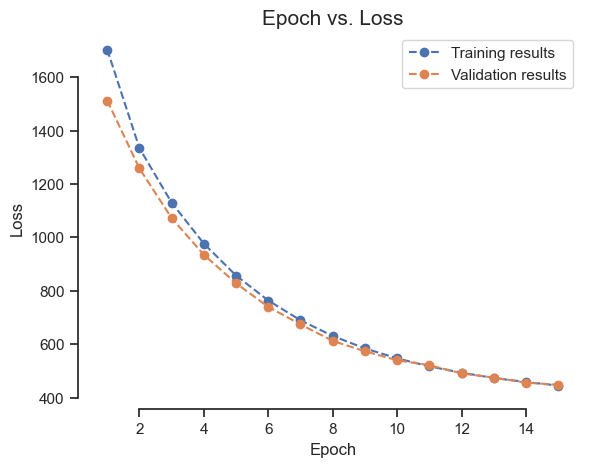


**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

In [40]:
# TODO refine the training function from above
# it should contain:
# - saving of losses
# - returning the mean loss

def train_model(model, train_dataloader, optimizer, loss_function, epochs):
    losses = [] 
    
    for epoch in range(epochs):
        epoch_loss = 0.0
        
        for inputs, labels in train_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            
            loss = loss_function(outputs, labels)
            loss.backward()
            
            optimizer.step()
            
            epoch_loss += loss.item()
        
        mean_loss = epoch_loss / len(train_dataloader)
        losses.append(mean_loss)
        
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {mean_loss}")
    
    return np.mean(losses)

train_model(model,train_dataloader,optimizer,loss_function,epochs)


Epoch [1/15], Loss: 384.4485151179998
Epoch [2/15], Loss: 383.30313717492373
Epoch [3/15], Loss: 382.2188308827427
Epoch [4/15], Loss: 380.712309272281
Epoch [5/15], Loss: 379.7200252125071
Epoch [6/15], Loss: 378.80586189590497
Epoch [7/15], Loss: 377.6547661286364
Epoch [8/15], Loss: 376.6247018232759
Epoch [9/15], Loss: 375.9428783060942
Epoch [10/15], Loss: 375.02730130720335
Epoch [11/15], Loss: 374.04225545604527
Epoch [12/15], Loss: 373.56917930008984
Epoch [13/15], Loss: 372.76881597552625
Epoch [14/15], Loss: 371.93604476259696
Epoch [15/15], Loss: 371.1126085908452


377.1924820804449

In [41]:
# TODO write a validation function that calculates the loss on the validation set
# you can also combine it with the training function

def test_model_validation(model,val_dataloader,loss_functions):
    val_losses = []
    model.eval()
    
    with torch.no_grad():
        for inputs,labels in val_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = loss_function(outputs,labels)
            val_losses.append(loss.item())
        
        mean_val_loss = sum(val_losses)/len(val_dataloader)
        print(f"Validation Loss: {mean_val_loss}")
        
test_model_validation(model,val_dataloader,loss_function)
            


Validation Loss: 403.1588840187169


In [42]:
# TODO write a run_training function that
# - calls the train and validate functions for each epoch
# - saves the train_losses, val_losses as arrays for each epoch

def run_training(model,optimizer,train_dataloader,epochs,loss_function,val_dataloader):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        train_epoch_loss = 0.0
        val_epoch_loss = 0.0
        for inputs,labels in train_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            
            loss = loss_function(outputs,labels)
            loss.backward()
            
            optimizer.step()
            
            train_epoch_loss += loss.item()
        mean_train_loss = train_epoch_loss/len(train_dataloader)
        train_losses.append(mean_train_loss)
        print(f"Epoch:  [{epoch+1}/{epochs}], Loss: {mean_train_loss}", end=" ")
        
        # Validation Part:
        for inputs,labels in val_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            model.eval()
            outputs = model(inputs)

            loss = loss_function(outputs,labels)
            val_epoch_loss += loss.item()
        mean_val_loss = val_epoch_loss/len(val_dataloader)
        val_losses.append(mean_val_loss)
        print(f"Validation Loss: {mean_val_loss}")
    
    return train_losses, val_losses

run_training(model,optimizer,train_dataloader,epochs,loss_function,val_dataloader)
            
            
            
            
            
        

        


        

Epoch:  [1/15], Loss: 370.5127336158943 Validation Loss: 397.9445817286782
Epoch:  [2/15], Loss: 369.8763001382315 Validation Loss: 398.2104477908129
Epoch:  [3/15], Loss: 369.50333507228225 Validation Loss: 394.72414350929404
Epoch:  [4/15], Loss: 368.6227463325156 Validation Loss: 393.7270457500892
Epoch:  [5/15], Loss: 368.1998714661325 Validation Loss: 396.3649571095831
Epoch:  [6/15], Loss: 367.4870843863253 Validation Loss: 393.4096304786382
Epoch:  [7/15], Loss: 366.991200328645 Validation Loss: 392.8559493804775
Epoch:  [8/15], Loss: 366.7862966220616 Validation Loss: 395.33601516642636
Epoch:  [9/15], Loss: 366.16920014855725 Validation Loss: 392.17419551807694
Epoch:  [10/15], Loss: 365.4004621025864 Validation Loss: 389.5437351944544
Epoch:  [11/15], Loss: 365.0693507182732 Validation Loss: 393.7516409482735
Epoch:  [12/15], Loss: 364.60810077749136 Validation Loss: 391.0218169634721
Epoch:  [13/15], Loss: 363.9945876704794 Validation Loss: 393.39096325142026
Epoch:  [14/15]

([370.5127336158943,
  369.8763001382315,
  369.50333507228225,
  368.6227463325156,
  368.1998714661325,
  367.4870843863253,
  366.991200328645,
  366.7862966220616,
  366.16920014855725,
  365.4004621025864,
  365.0693507182732,
  364.60810077749136,
  363.9945876704794,
  363.5339149893936,
  363.09093810174306],
 [397.9445817286782,
  398.2104477908129,
  394.72414350929404,
  393.7270457500892,
  396.3649571095831,
  393.4096304786382,
  392.8559493804775,
  395.33601516642636,
  392.17419551807694,
  389.5437351944544,
  393.7516409482735,
  391.0218169634721,
  393.39096325142026,
  391.40418327890285,
  391.56552261493243])

In [43]:
# TODO call the run_training function and run it for 10 epochs.
num_epochs = 30
model = LinearRegression(input_dim,output_dim)
model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
n_train_loss,n_val_loss = run_training(model,optimizer,train_dataloader,num_epochs,loss_function,val_dataloader)
print(n_train_loss)


Epoch:  [1/30], Loss: 1720.9562471912297 Validation Loss: 1531.8182067654902
Epoch:  [2/30], Loss: 1350.7348222344226 Validation Loss: 1287.7579266591745
Epoch:  [3/30], Loss: 1144.6612679948958 Validation Loss: 1103.4800590558154
Epoch:  [4/30], Loss: 988.9562405884152 Validation Loss: 970.8708575464652
Epoch:  [5/30], Loss: 867.9909498733705 Validation Loss: 864.1948014013627
Epoch:  [6/30], Loss: 773.4368302646448 Validation Loss: 774.7076756810371
Epoch:  [7/30], Loss: 698.3399381906511 Validation Loss: 713.7150826726502
Epoch:  [8/30], Loss: 639.238537491878 Validation Loss: 667.4423285991573
Epoch:  [9/30], Loss: 592.1523612755469 Validation Loss: 616.1077241604554
Epoch:  [10/30], Loss: 554.0971430752264 Validation Loss: 585.5613337685141
Epoch:  [11/30], Loss: 523.6352609569219 Validation Loss: 550.8648065622363
Epoch:  [12/30], Loss: 499.33604546524225 Validation Loss: 526.4004310754957
Epoch:  [13/30], Loss: 479.7019841957593 Validation Loss: 514.708299555209
Epoch:  [14/30],

In [44]:
# TODO write a plot function
def plot_training_validation_curves(training_mse, validation_mse, lr_list=None, batch_size = None):
    if lr_list:
        plt.figure(figsize=(15,11))
        for i, lr in enumerate(lr_list):
            epochs = range(1, len(training_mse[i]) + 1)
            #plt.scatter(epochs, training_mse[i], label=f'Training Loss (lr={lr})', marker='o')
            plt.scatter(epochs, validation_mse[i], label=f'Validation Loss (lr={lr})', marker='o')

            #plt.plot(epochs, training_mse[i], linestyle='--')
            plt.plot(epochs, validation_mse[i], linestyle='--')
    elif batch_size:
        plt.figure(figsize=(15,11))
        for i, batchSize in enumerate(batch_size):
            epochs = range(1, len(training_mse[i]) + 1)
            #plt.scatter(epochs, training_mse[i], label=f'Training Loss (BatchSize={batch_size})', marker='o')
            plt.scatter(epochs, validation_mse[i], label=f'Validation Loss (Batch Size={batchSize})', marker='o')

            #plt.plot(epochs, training_mse[i], linestyle='--')
            plt.plot(epochs, validation_mse[i], linestyle='--')
        
    else:
        epochs = range(1, len(training_mse) + 1)
        plt.scatter(epochs, training_mse, label='Training Loss', marker='o')
        plt.scatter(epochs, validation_mse, label='Validation Loss', marker='o')

        plt.plot(epochs, training_mse, linestyle='--', color='blue')
        plt.plot(epochs, validation_mse, linestyle='--', color='orange')

    plt.title('Epochs vs Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

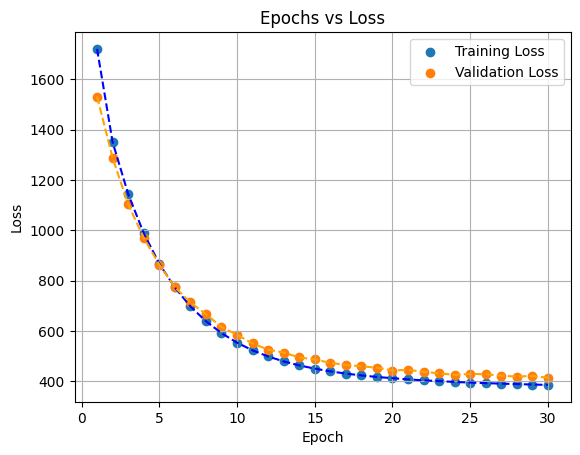

In [45]:
# TODO plot losses
plot_training_validation_curves(n_train_loss,n_val_loss)

Comment on the loss curve. Does it look as expected? Why/Why not?
If not, what might be the reason.

# Hyperparameters influence

Now, once we successfully reproduced linear regression using PyTorch, lets explore the hyperparameters influence, such as learning rate or batch size.

Train several models with 30 train epochs and using different learning rates - [0.0001, 0.001, 0.01, 0.1, 1, 10].
What do you notice? Why?

*Hints*: 
* Do not forget to reinitialize models and update the optimizers
* Use different colors and line styles to display different learning rates and train-validation splits

In [46]:
num_epochs = 30
## TODO - train models with different learning rates
lr_list = [0.01,0.001,0.0001,0.00001]
lr_train_losses = []
lr_val_losses=[]
for lr in lr_list:
    model = LinearRegression(input_dim,output_dim)
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr = lr)
    train_loss,val_loss = run_training(model,optimizer,train_dataloader,num_epochs,loss_function,val_dataloader)
    lr_train_losses.append(train_loss)
    lr_val_losses.append(val_loss)
print(lr_val_losses)
    
    

Epoch:  [1/30], Loss: 945.9124503042224 Validation Loss: 573.8132267999897
Epoch:  [2/30], Loss: 453.8315314186802 Validation Loss: 448.6935292716349
Epoch:  [3/30], Loss: 396.42462331389737 Validation Loss: 414.65312792682687
Epoch:  [4/30], Loss: 380.4926558901317 Validation Loss: 404.3339761208135
Epoch:  [5/30], Loss: 372.03273931008954 Validation Loss: 394.1123090156404
Epoch:  [6/30], Loss: 366.59943109522305 Validation Loss: 388.5671843142546
Epoch:  [7/30], Loss: 362.1681313099447 Validation Loss: 386.3268829050593
Epoch:  [8/30], Loss: 359.45756823528995 Validation Loss: 386.2359869306352
Epoch:  [9/30], Loss: 356.89609445672414 Validation Loss: 377.7337700707462
Epoch:  [10/30], Loss: 355.00976806682786 Validation Loss: 376.3566051611591
Epoch:  [11/30], Loss: 353.42226223574767 Validation Loss: 372.5353980648066
Epoch:  [12/30], Loss: 352.03366927539116 Validation Loss: 375.4992679097685
Epoch:  [13/30], Loss: 350.77919848483873 Validation Loss: 372.4533848631173
Epoch:  [14

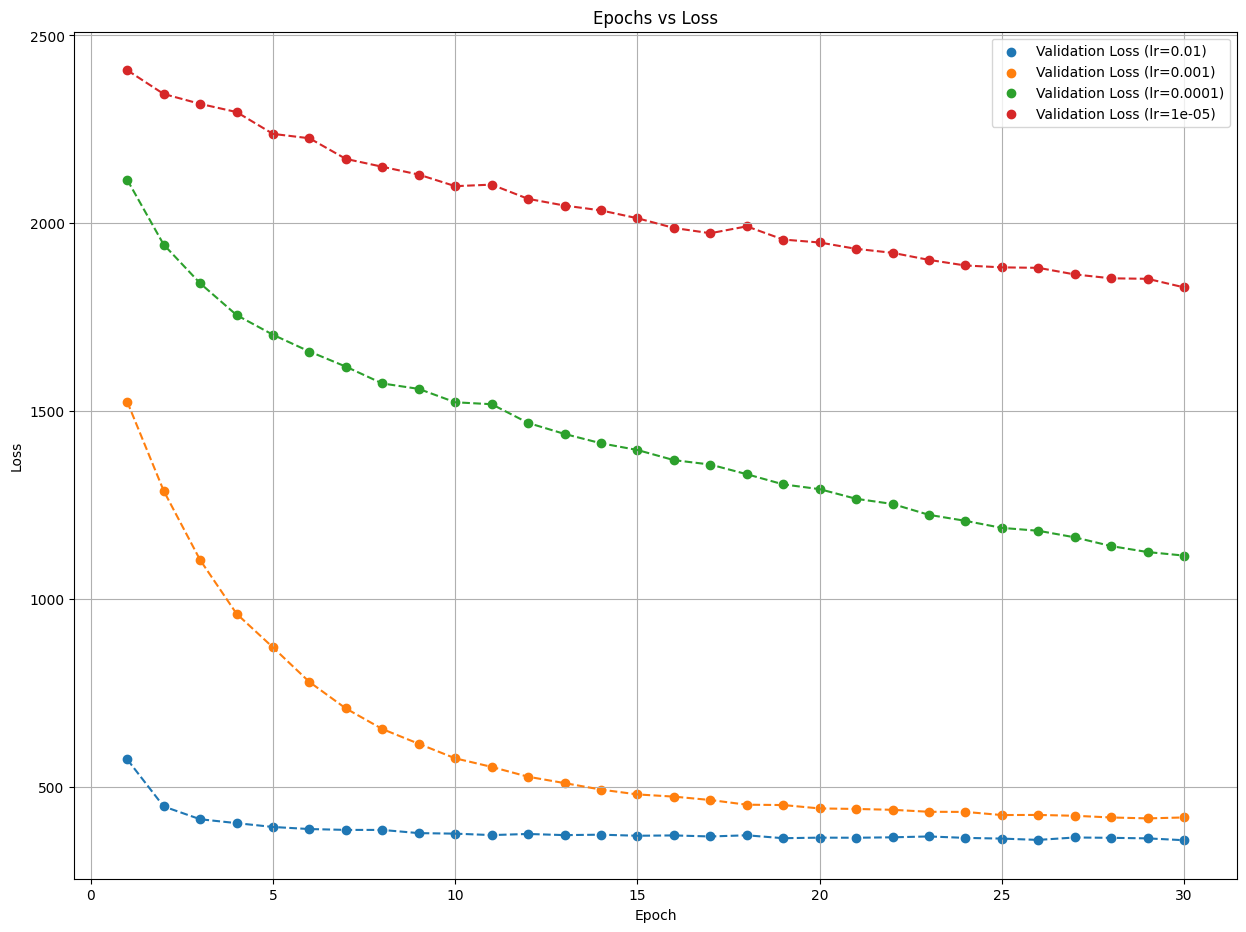

In [47]:
## TODO plot the losses from different models. What do you see and why?
plot_training_validation_curves(lr_train_losses,lr_val_losses,lr_list)

## How do we know the amount of epochs and best learning rates?

The honest answer - we just try it out. The heuristics, which are typically used are the following
* use adaptive optimizers. Adam would be a typical example. It is an adaptive learning rate optimization algorithm that is designed to be appropriate for non-stationary objectives and problems with very noisy and/or sparse gradients. More details [here](https://paperswithcode.com/method/adam). This makes the training more robust to the choise of the the learning rate
* Use schedulers for the training. They change the value of the learning rate based on the loss behaviour. The most typical ones are
  * Early stopper . The early stopper is helpful to avoid redundunt computations and overfitting. It basically stops the train loop if the loss function does not decrease on the validation split for some time.
  * Warm up. Warm up slowly increases the learning rate in the begining of the training. This helps to avoid bad influence of not-so-good initialisation and especially helpful for the layers, which need to accumulate statistics, such as BatchNorm. We will use such layers later in the course.

In [48]:
## TODO: adopt the train function with the early stopper logic


def run_training_early_stopper(model, lr, train_dataloader, epochs, loss_function, val_dataloader, tol, N):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    
    for epoch in range(epochs):
        train_epoch_loss = 0.0
        val_epoch_loss = 0.0
        
        # Training
        for inputs, labels in train_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            train_epoch_loss += loss.item()
        
        mean_train_loss = train_epoch_loss / len(train_dataloader)
        train_losses.append(mean_train_loss)
        
        # Validation
        with torch.no_grad():
            for inputs, labels in val_dataloader:
                inputs, labels = inputs.to(device), labels.to(device)
                model.eval()
                outputs = model(inputs)
                loss = loss_function(outputs, labels)
                val_epoch_loss += loss.item()
        
        mean_val_loss = val_epoch_loss / len(val_dataloader)
        val_losses.append(mean_val_loss)
        
        # Early stopping logic
        if mean_val_loss < best_val_loss - tol:
            best_val_loss = mean_val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement == N:
                print(f"Validation loss did not improve for {N} epochs. Early stopping...")
                break
        
        print(f"Epoch: [{epoch + 1}/{epochs}], Train Loss: {mean_train_loss}, Validation Loss: {mean_val_loss}")
    
    return train_losses, val_losses


### Task
Modify the the training function with the early stopper logic.
This should stop the training loop if the validation loss function does not improve over $N$ epochs. The improvement is only something, which is better than the $tol$ value, which stays for the tolerance.

Use $tol=2$, $N=5$, $num\_epochs=150$, $lr=0.01$ for the function start.

**Question**:
* Can $tol=0$? Why?
* How many epochs it would really run? Try to change the $lr=0.001$ and $lr=0.0001$ and see when this would stop.
* What happens if you increase the tolerance?
* What if you increase $N$?

In [49]:
## TODO: Train models with early stopping with the different learning rates
LR=[0.001,0.0001]
train_loss = []
val_loss=[]
for lr in LR:
    train_losses,val_losses=run_training_early_stopper(model,lr,train_dataloader,150,loss_function,val_dataloader,2,5)
    train_loss.append(train_losses)
    val_loss.append(val_losses)
    

    

Epoch: [1/150], Train Loss: 1764.7986380614593, Validation Loss: 1831.812026805315
Epoch: [2/150], Train Loss: 1757.6319896032721, Validation Loss: 1798.4785185005785
Epoch: [3/150], Train Loss: 1750.4073455858588, Validation Loss: 1823.4240365381297
Epoch: [4/150], Train Loss: 1743.3055966317124, Validation Loss: 1790.45784310568
Epoch: [5/150], Train Loss: 1735.9426450577, Validation Loss: 1800.7926921068288
Epoch: [6/150], Train Loss: 1728.6885573778452, Validation Loss: 1806.228799874418
Epoch: [7/150], Train Loss: 1721.8914148608221, Validation Loss: 1785.239530637468
Epoch: [8/150], Train Loss: 1717.2535989133648, Validation Loss: 1790.2734700375102
Epoch: [9/150], Train Loss: 1710.9933818431487, Validation Loss: 1777.9693789423993
Epoch: [10/150], Train Loss: 1704.9056429119016, Validation Loss: 1775.8129361295385
Epoch: [11/150], Train Loss: 1698.6342784112674, Validation Loss: 1758.1572249155195
Epoch: [12/150], Train Loss: 1692.59077744695, Validation Loss: 1743.645387896555


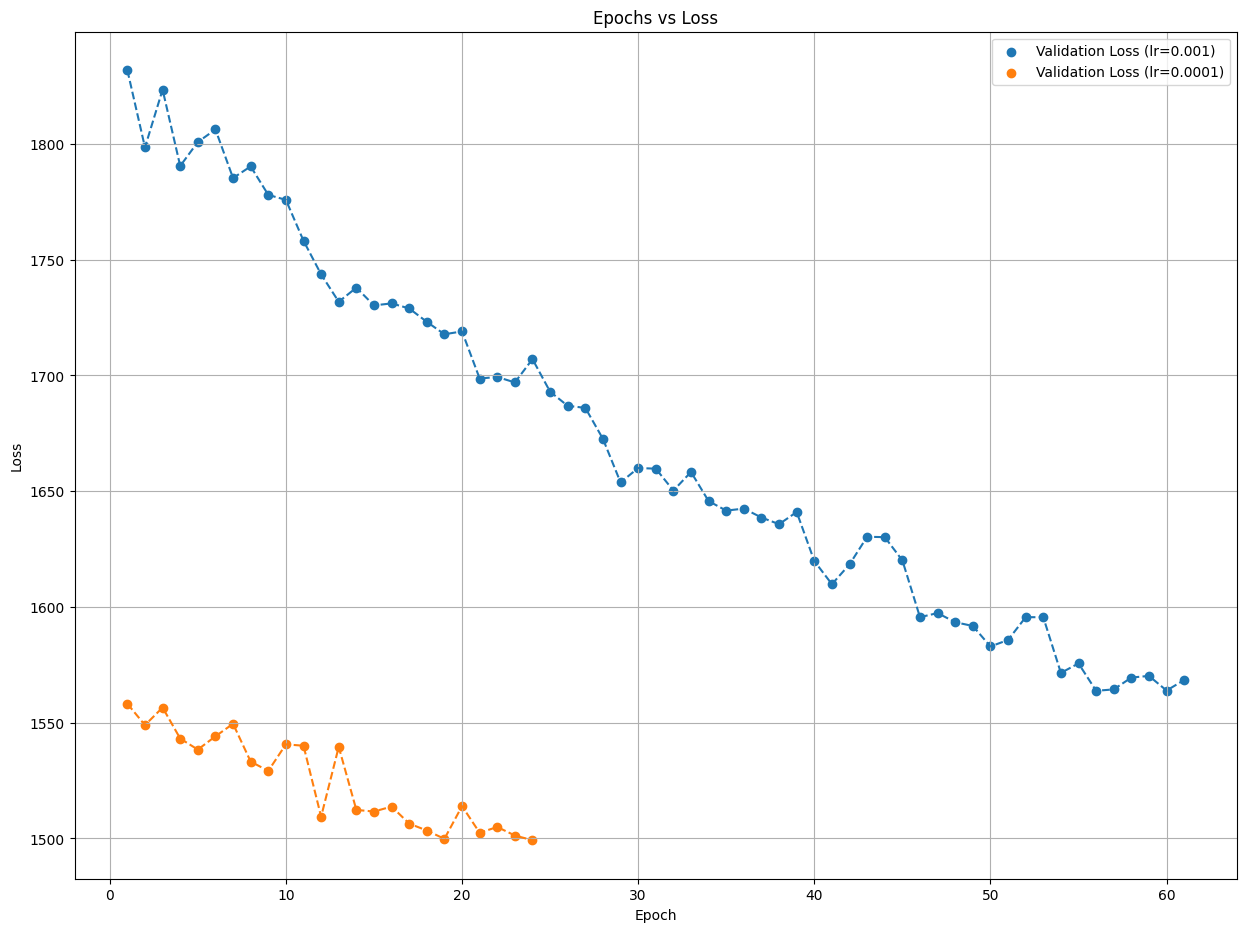

In [50]:
## TODO: Visualize the results. What do you see and why?
plot_training_validation_curves(train_loss,val_loss,LR)


## Now lets try to explore the impact of the batch size

**Task:** Fix $num\_epochs = 150$ and $lr = 0.001$ and try to change the batch size using values $[2, 4, 32, 128, 1024]$ for the batch size.
* What impact the batch size have? Why?

In [51]:
num_epochs = 150
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
## TODO: Train with different batch sizes

train_loss = []
val_loss=[]
batchsize=[2,4,32,128,1024]
for batch in batchsize:
    train_dataloader = DataLoader(conductor_train, batch_size = batch, shuffle = True)
    val_dataloader =  DataLoader(conductor_val, batch_size = batch, shuffle = True)
    model = LinearRegression(input_dim,output_dim)
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr = lr)
    train_losses,val_losses=run_training(model,optimizer,train_dataloader,num_epochs,loss_function,val_dataloader)
    train_loss.append(train_losses)
    val_loss.append(val_losses)
    
    

Epoch:  [1/150], Loss: 431.8356394422861 Validation Loss: 382.67055723559133
Epoch:  [2/150], Loss: 357.1022465878894 Validation Loss: 370.33367147230496
Epoch:  [3/150], Loss: 349.37540938546226 Validation Loss: 360.43280222897073
Epoch:  [4/150], Loss: 344.779858344258 Validation Loss: 362.58398493345146
Epoch:  [5/150], Loss: 341.8686275420652 Validation Loss: 357.18863166475137
Epoch:  [6/150], Loss: 339.5023372397046 Validation Loss: 363.39702680410585
Epoch:  [7/150], Loss: 336.41828862651755 Validation Loss: 356.8192421839795
Epoch:  [8/150], Loss: 334.97266905515585 Validation Loss: 372.7398574148329
Epoch:  [9/150], Loss: 333.47116748342773 Validation Loss: 347.8915317208187
Epoch:  [10/150], Loss: 332.91382569790363 Validation Loss: 351.2840852815432
Epoch:  [11/150], Loss: 331.19278186593164 Validation Loss: 346.31920939282116
Epoch:  [12/150], Loss: 331.23381832293205 Validation Loss: 349.758611017407
Epoch:  [13/150], Loss: 329.3798713130112 Validation Loss: 359.0154919911

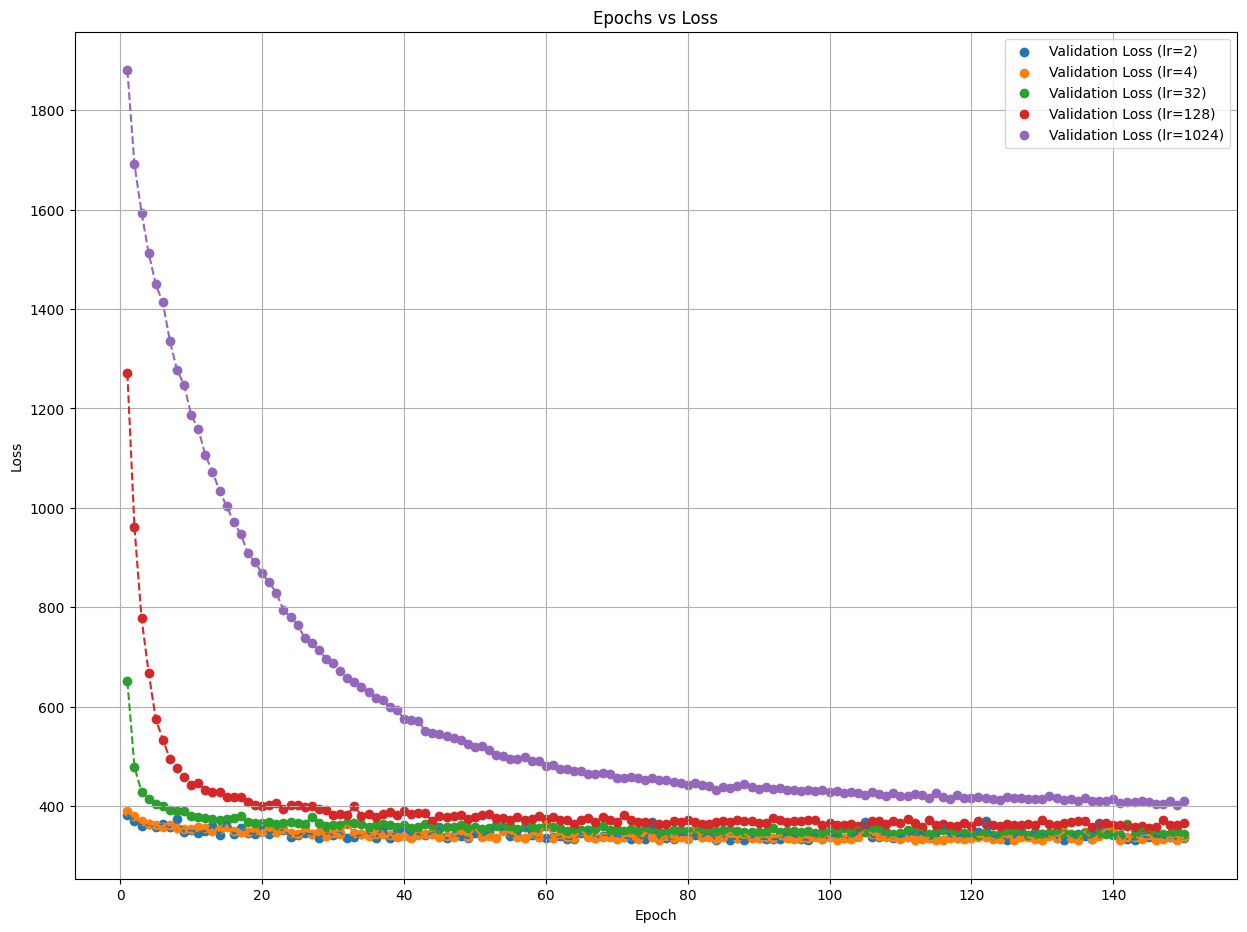

In [52]:
## TODO: Visualize the differences 
plot_training_validation_curves(train_loss,val_loss,batchsize)
